In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import time
from scipy import stats
from config import api_key
from pprint import pprint
import yfinance as yf

In [2]:
master_dict = {
    'AMZN':{
        'Quarters':["Q3'19", "Q4'19", "Q1'20", "Q2'20", "Q3'20"],
        'Revenue':[],
        'Stock Price':[]},
    'WMT':{
        'Quarters':["Q4'19", "Q1'20", "Q2'20", "Q3'20", "Q4'20"],
        'Revenue':[],
        'Stock Price':[]},
    'COST':{
        'Quarters':["Q4'19", "Q1'20", "Q2'20", "Q3'20", "Q4'20"],
        'Revenue':[],
        'Stock Price':[]},
    'SFM':{
        'Quarters':["Q3'19", "Q4'19", "Q1'20", "Q2'20", "Q3'20"],
        'Revenue':[],
        'Stock Price':[]},
    'ACI':{
        'Quarters':["Q4'19", "Q1'20", "Q2'20", "Q3'20", "Q4'20"],
        'Revenue':[],
        'Stock Price':[]},
    
    }

companies = ['AMZN', 'WMT', 'COST', 'SFM', 'ACI']

for company in companies:
    url = f"https://financialmodelingprep.com/api/v3/income-statement/{company}\
?period=quarter&limit=5&apikey={api_key}"
    try:
        response = requests.get(url).json()
    except:
        print("Sorry, we don't have this ticker: " + company)
    for i in range(0,5):
        #master_dict[company]['Dates'].append(response[i]['date'])
        master_dict[company]['Revenue'].append(response[i]['revenue'])
        
pprint (master_dict)

{'ACI': {'Quarters': ["Q4'19", "Q1'20", "Q2'20", "Q3'20", "Q4'20"],
         'Revenue': [38509200000,
                     15757600000,
                     22751600000,
                     22751600000,
                     15436800000],
         'Stock Price': []},
 'AMZN': {'Quarters': ["Q3'19", "Q4'19", "Q1'20", "Q2'20", "Q3'20"],
          'Revenue': [96145000000,
                      88912000000,
                      75452000000,
                      87436000000,
                      69981000000],
          'Stock Price': []},
 'COST': {'Quarters': ["Q4'19", "Q1'20", "Q2'20", "Q3'20", "Q4'20"],
          'Revenue': [53383000000,
                      37266000000,
                      39072000000,
                      37040000000,
                      47498000000],
          'Stock Price': []},
 'SFM': {'Quarters': ["Q3'19", "Q4'19", "Q1'20", "Q2'20", "Q3'20"],
         'Revenue': [1577598000,
                     1642788000,
                     1646539000,
               

In [3]:

tickerdf = yf.download(tickers = companies,period = '2y',group_by = 'ticker',auto_adjust = True)

amzndf = tickerdf['AMZN'].reset_index(drop=False)
wmtdf = tickerdf['WMT'].reset_index(drop=False)
costdf = tickerdf['COST'].reset_index(drop=False)
sfmdf = tickerdf['SFM'].reset_index(drop=False)
acidf = tickerdf['ACI'].reset_index(drop=False)

dates = ['9/30/2019','12/31/2019','3/31/2020','6/30/2020','9/30/2020']

amzndf = amzndf.loc[amzndf['Date'].isin(dates)]
wmtdf = wmtdf.loc[wmtdf['Date'].isin(dates)]
costdf = costdf.loc[costdf['Date'].isin(dates)]
sfmdf = sfmdf.loc[sfmdf['Date'].isin(dates)]
acidf = acidf.loc[acidf['Date'].isin(dates)]


def add_stock(df,company):
    for item in list(df['Open']):
        master_dict[company]['Stock Price'].append(item)

add_stock(amzndf,'AMZN')
add_stock(wmtdf,'WMT')
add_stock(costdf,'COST')
add_stock(sfmdf,'SFM')
add_stock(acidf,'ACI')

[*********************100%***********************]  5 of 5 completed


In [4]:
# amzndf['Quarters'] = ["Q3 2019", "Q4 2019", "Q1 2020", "Q2 2020", "Q3 2020"]
# wmtdf['Quarters'] = ["Q4 2019", "Q1 2019", "Q2 2020", "Q3 2020", "Q4 2020"]
# costdf['Quarters'] = ["Q4 2019", "Q1 2019", "Q2 2020", "Q3 2020", "Q4 2020"]
# sfmdf['Quarters'] = ["Q3 2019", "Q4 2019", "Q1 2020", "Q2 2020", "Q3 2020"]
# bbydf['Quarters'] = ["Q4 2019", "Q1 2019", "Q2 2020", "Q3 2020", "Q4 2020"]
# amzndf.head()

In [5]:
pprint (master_dict)

{'ACI': {'Quarters': ["Q4'19", "Q1'20", "Q2'20", "Q3'20", "Q4'20"],
         'Revenue': [38509200000,
                     15757600000,
                     22751600000,
                     22751600000,
                     15436800000],
         'Stock Price': [nan, nan, nan, 15.46408141922754, 13.686257676622269]},
 'AMZN': {'Quarters': ["Q3'19", "Q4'19", "Q1'20", "Q2'20", "Q3'20"],
          'Revenue': [96145000000,
                      88912000000,
                      75452000000,
                      87436000000,
                      69981000000],
          'Stock Price': [1726.989990234375,
                          1842.0,
                          1964.3499755859375,
                          2685.070068359375,
                          3141.139892578125]},
 'COST': {'Quarters': ["Q4'19", "Q1'20", "Q2'20", "Q3'20", "Q4'20"],
          'Revenue': [53383000000,
                      37266000000,
                      39072000000,
                      37040000000,
         

In [6]:
pprint(wmtdf)

          Date        Open        High         Low       Close    Volume
197 2019-09-30  116.200304  116.954284  116.092593  116.210098   3401400
261 2019-12-31  117.537900  117.832977  116.249411  116.888733   4912000
323 2020-03-31  112.930600  114.787919  111.280754  112.248932   8752800
386 2020-06-30  118.299452  119.202421  117.624702  118.855125   6836400
450 2020-09-30  136.889625  141.223789  136.700315  139.400452  11605300


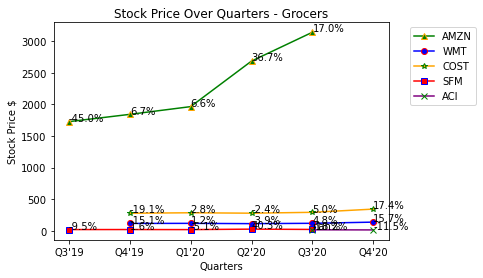

In [7]:
colors = ['green','blue','orange','red','purple']
colors2 = ['orange','red','green','blue','green']
markers = ['^','o','*','s','x']

def plot_graph(ticker,i):
    xaxis = (master_dict[ticker]['Quarters'])
    yaxis = master_dict[ticker]['Stock Price']
    plt.plot(xaxis,yaxis, marker = markers[i],markeredgecolor=colors2[i],color = colors[i])
    plt.xlabel('Quarters')
    plt.ylabel(f'Stock Price $')
    plt.title(f'Stock Price Over Quarters - Grocers')
    z = 0
    for x,y in zip(xaxis,yaxis):
        if x == '2019-09-30':
            z = z + 1
            continue
        change = str(round(((float(yaxis[z]) / float(yaxis[z-1])) - 1) * 100,1)) + '%'
        plt.annotate(
            s = change,
            xy = (x,y),
            xytext = (x,(y + 10))
        )
        z = z + 1
i = 0
for name in companies:
    plot_graph(name, i)
    i = i + 1

plt.legend(companies,bbox_to_anchor=(1.05, 1), loc='upper left')


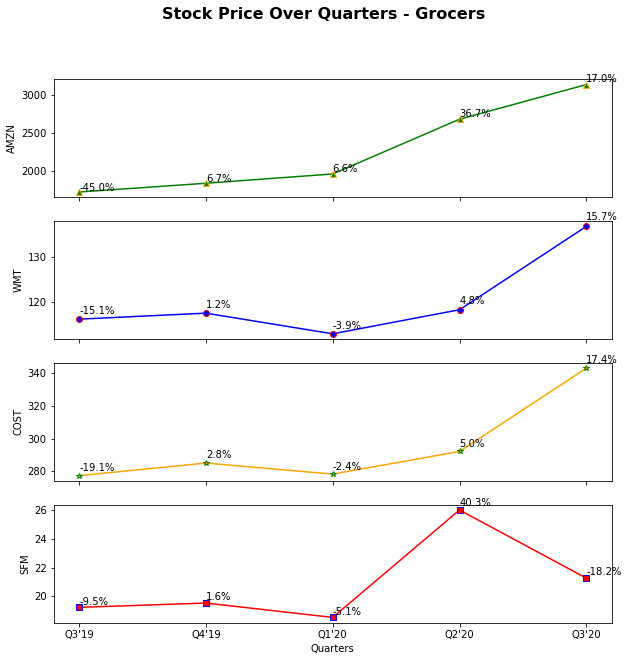

In [25]:
colors = ['green','blue','orange','red','purple']
colors2 = ['orange','red','green','blue','green']
markers = ['^','o','*','s','x']
limitx = []

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(10,10))
plots = [ax1, ax2, ax3, ax4]
fig.suptitle("Stock Price Over Quarters - Grocers", fontsize=16, fontweight="bold")
plt.xlabel('Quarters')
plt.ylabel('Stock Price')



def plot_graph(ticker,i):
    xaxis = (master_dict[ticker]['Quarters'])
    yaxis = master_dict[ticker]['Stock Price']
    plots[i].plot(xaxis,yaxis, marker = markers[i],markeredgecolor=colors2[i],color = colors[i])
    plots[i].set_ylabel(ticker)
    z = 0
    for x,y in zip(xaxis,yaxis):
        if x == '2019-09-30':
            z = z + 1
            continue
        change = str(round(((float(yaxis[z]) / float(yaxis[z-1])) - 1) * 100,1)) + '%'
        plots[i].annotate(
            s = change,
            xy = (x,y),
            xytext = (x,(y + (y*0.01)))
        )
        z = z + 1
i = 0
for name in companies[:4]:
    plot_graph(name, i)
    i = i + 1



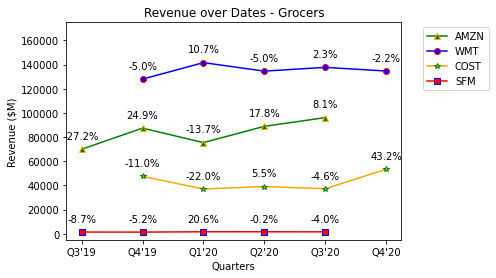

In [24]:
def plot_graph2(ticker,i):
    xaxis = (master_dict[ticker]['Quarters'])
    yaxis = list(master_dict[ticker]['Revenue'])
    yaxis.reverse()
    for j in range (0,5):
        yaxis[j] = float(yaxis[j]) / 1000000
    plt.plot(xaxis,yaxis, marker = markers[i],markeredgecolor=colors2[i],color = colors[i])
    plt.xlabel('Quarters')
    plt.ylabel(f'Revenue ($M)')
    plt.title(f'Revenue over Dates - Grocers')
    z = 0
    
    for x,y in zip(xaxis,yaxis):
        if x == '2019-09-30':
            z = z + 1
            continue
        try:    
            change = str(round(((float(yaxis[z]) / float(yaxis[z-1])) - 1) * 100,1)) + '%'
        except:
            print("Dividing by zero")
        plt.annotate(
            s = change,
            xy = (x,y),
            textcoords="offset points", 
            xytext=(0,10),
            ha='center'
        )
        z = z + 1

i = 0

for name in companies[:4]:
    plot_graph2(name, i)
    i = i + 1

plt.legend(companies,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(-5000,175000)
scale_factor = 5